In [22]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
all_df = clinical_df.join(mouse_df.set_index('Mouse ID'),on='Mouse ID')
all_df
# Combine the data into a single dataset
#mouse_df
#res = len(numb)
#res
# Display the data table for preview
#clinical_df
markers = ['s','v','d','*']
colors = ['m','y','k','g']
color_alt = ['#cc0066','#cc9900','#0086b3','#669900']

In [23]:
w_df = all_df.copy()
w_df.set_index('Drug')
w_df=w_df.drop(['Mouse ID','Metastatic Sites'],axis=1)

w_df_grp = w_df.groupby(['Drug','Timepoint'])


# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_mean = w_df_grp['Tumor Volume (mm3)'].mean()


# Convert to DataFrame

df = pd.DataFrame(vol_mean)

response_summary = pd.DataFrame({'Tumor Volume mm3' : w_df_grp['Tumor Volume (mm3)'].mean()})

# remove the index setting so that it will display in desired framework.
new_summary = response_summary.reset_index()
new_summary.head(5)
#w_df.head(20)
#vol_sem


,Drug,Timepoint,Tumor Volume mm3
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


## Tumor Response to Treatment

In [24]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_sem = w_df_grp['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
vol_sem_summary_pre = pd.DataFrame({'Tumor Volume SEM' : vol_sem})
vol_sem_summary = vol_sem_summary_pre.reset_index()

# Preview DataFrame
vol_sem_summary.head(5)

,Drug,Timepoint,Tumor Volume SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [25]:
# Minor Data Munging to Re-Format the Data Frames
summary_need_transpose = new_summary.copy()
error_need_tran = vol_sem_summary.copy()

summary_transpose = summary_need_transpose.pivot(index='Timepoint', columns='Drug')
error_transpose = error_need_tran.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
summary_transpose.head(5)
#error_transpose.head(10)

Tumor Volume mm3                                              \
Drug             Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                
0                45.000000  45.000000  45.000000  45.000000  45.000000   
5                44.266086  46.503051  47.062001  47.389175  46.796098   
10               43.084291  48.285125  49.403909  49.582269  48.694210   
15               42.064317  50.094055  51.296397  52.399974  50.933018   
20               40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

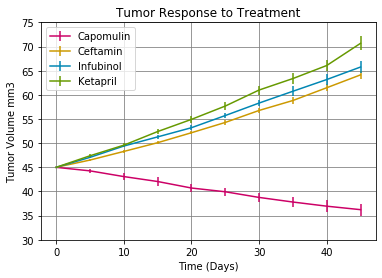

45

In [26]:
# Generate the Plot (with Error Bars)
ax = plt.gca()
x_limit = 45
x_axis = np.arange(0,x_limit,5)

# Save the Figure

drug_names = []
[drug_names.append(drug) for drug in summary_transpose['Tumor Volume mm3']]
# Use index of first drug to get x scale values.
x_limits = summary_transpose['Tumor Volume mm3'][drug_names[0]].keys()
#thedays
#drug_names
max_y_val = 0
min_y_val = 10
for drug in drug_names:
    temp_max = summary_transpose['Tumor Volume mm3'][drug].max()
    temp_min = summary_transpose['Tumor Volume mm3'][drug].min()
    #plt.errorbar(x_limits, summary_transpose['Tumor Volume mm3'][drug],yerr=error_transpose['Tumor Volume SEM'][drug],label=drug)
    if temp_max > max_y_val:
        max_y_val = int(temp_max)
    if temp_min > min_y_val:
        min_y_val = int(temp_min)

for i in range(0,4,1):        
    plt.errorbar(x_limits, summary_transpose['Tumor Volume mm3'][drug_names[i]],
                 yerr=error_transpose['Tumor Volume SEM'][drug_names[i]],label=drug_names[i],
                 color=matplotlib.colors.to_hex(color_alt[i],keep_alpha=False))

plt.ylim(min_y_val - 15, max_y_val + 5)
#***************************************************************
plt.ylabel("Tumor Volume mm3")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.grid(color='gray', axis='both')
#***************************************************************

plt.legend(loc='best')
fname = "output/tumor_response.png"
plt.savefig(fname)
plt.show()
min_y_val

## Metastatic Response to Treatment

In [27]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site = all_df.copy()
meta_site = meta_site.set_index('Drug')
meta_site = meta_site.drop(['Mouse ID','Tumor Volume (mm3)'],axis=1)
meta_site_grp = meta_site.groupby(['Timepoint','Drug'])
# Convert to DataFrame
meta_mean = meta_site_grp['Metastatic Sites'].mean()
meta_site_grp.head(5)
meta_pre_summ = pd.DataFrame({'meta_mean' : meta_mean})

meta_summary = meta_pre_summ.reset_index()
# Preview DataFrame
meta_summary.head()

,Timepoint,Drug,meta_mean
0,0,Capomulin,0.0
1,0,Ceftamin,0.0
2,0,Infubinol,0.0
3,0,Ketapril,0.0
4,0,Naftisol,0.0


In [28]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = meta_site_grp['Metastatic Sites'].sem()

# Convert to DataFrame
meta_sem_summary_pre = pd.DataFrame({'meta_site_sem' : meta_sem})
meta_sem_summary = meta_sem_summary_pre.reset_index()
# Preview DataFrame
meta_sem_summary.head(5)

,Timepoint,Drug,meta_site_sem
0,0,Capomulin,0.0
1,0,Ceftamin,0.0
2,0,Infubinol,0.0
3,0,Ketapril,0.0
4,0,Naftisol,0.0


In [29]:
# Minor Data Munging to Re-Format the Data Frames
meta_summary_need_transpose = meta_summary.copy()
meta_error_need_tran = meta_sem_summary.copy()

meta_summary_transpose = meta_summary_need_transpose.pivot(index='Timepoint', columns='Drug')
meta_error_transpose = meta_error_need_tran.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
meta_error_transpose.head(5)

meta_site_sem                                                    \
Drug          Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                   
0              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5              0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10             0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15             0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20             0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

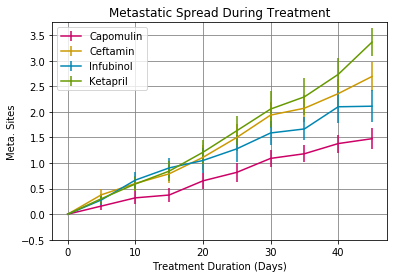

In [30]:
# Generate the Plot (with Error Bars)
# ******************** Scaling ***********************************************************
ax = plt.gca()
x_limit = 45
x_axis = np.arange(0,x_limit,5)

x_limits = meta_summary_transpose['meta_mean'][drug_names[0]].keys()
#thedays
#drug_names
max_y_val = 0
min_y_val = 10
for drug in drug_names:
    temp_max = meta_summary_transpose['meta_mean'][drug].max()
    temp_min = meta_summary_transpose['meta_mean'][drug].min()
    if temp_max > max_y_val:
        max_y_val = int(temp_max)
    if temp_min > min_y_val:
        min_y_val = int(temp_min)

for i in range(0,4,1):
    plt.errorbar(x_limits, meta_summary_transpose['meta_mean'][drug_names[i]],
                 yerr=meta_error_transpose['meta_site_sem'][drug_names[i]],
                 color=matplotlib.colors.to_hex(color_alt[i],keep_alpha=False),label=drug_names[i])

plt.ylim(min_y_val - 10.5, max_y_val + 0.75)
#***************************************************************
plt.ylabel("Meta. Sites")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.grid(color='gray', axis='both')
#***************************************************************
plt.legend(loc='best')

fname = "output/meta_site_response.png"
# Save the Figure
plt.savefig(fname)

# Show the Figure
plt.show()

## Survival Rates

In [31]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = all_df.copy()
mice_df.set_index('Drug')
mice_df = mice_df.drop(['Tumor Volume (mm3)','Metastatic Sites'],axis=1)
mice_df_grp = mice_df.groupby(['Timepoint','Drug'])

# Convert to DataFrame
mouse_df = pd.DataFrame({'Mouse Count' : mice_df_grp['Mouse ID'].nunique()})
# Preview DataFrame
mouse_df = mouse_df.reset_index()
mouse_df.head(5)

,Timepoint,Drug,Mouse Count
0,0,Capomulin,25
1,0,Ceftamin,25
2,0,Infubinol,25
3,0,Ketapril,25
4,0,Naftisol,25


In [32]:
mouse_transpose = mouse_df.copy()
mouse_transpose = mouse_transpose.pivot(index='Timepoint', columns='Drug')
mouse_transpose['Mouse Count'].head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


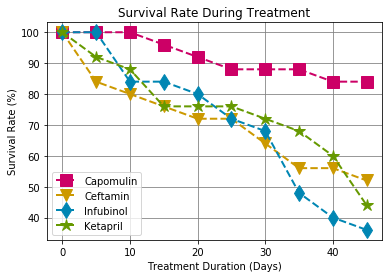

In [33]:
# Convert to % survival rate.
mouse_percent = mouse_transpose['Mouse Count'] / mouse_transpose['Mouse Count'][drug_names[0]][0] * 100
# reusing the lists: ** x_limits and drug_names **


for i in range(0,4,1):    
    plt.plot(x_limits, mouse_percent[drug_names[i]], color=matplotlib.colors.to_hex(color_alt[i],keep_alpha=False), 
             marker=markers[i], linestyle='dashed',linewidth=2, markersize=12,label=drug_names[i])
    

plt.legend(loc='best')
#***************************************************************
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.grid(color='gray', axis='both')
#***************************************************************

fname = "output/survive_percent.png"
plt.savefig(fname)
plt.show()


In [34]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

# Metastatic Spread During Treatment

In [35]:
percent_change = []
temp_names = []
color_list = []
percent_threshold = 46.5

for drug in drug_names:
    if ((summary_transpose['Tumor Volume mm3'][drug][45]-45.0)/45.0*100) < percent_threshold:
        percent_change.append((summary_transpose['Tumor Volume mm3'][drug][45]-45.0)/45.0*100)
        temp_names.append(drug)
        if ((summary_transpose['Tumor Volume mm3'][drug][45]-45.0)/45.0*100) > 0:
            color_list.append('g')
        else:
            color_list.append('r')

all_percent_change = []
[all_percent_change.append((summary_transpose['Tumor Volume mm3'][drug][45]-45.0)/45.0*100) for drug in drug_names]
#percent_change
drug_percent_df = pd.DataFrame({"Drug" : temp_names, "Percent Growth" : percent_change})
drug_percent_df['Percent Growth'] = drug_percent_df['Percent Growth'].astype(float).map("{:,.1f}%".format)

all_percent_change_df = pd.DataFrame({"Drug" : drug_names, "Percent Growth" : all_percent_change})
all_percent_change_df['Percent Growth'] = all_percent_change_df['Percent Growth'].astype(float).map("{:,.1f}%".format)
all_percent_change_df.set_index('Drug')
all_percent_change_df

,Drug,Percent Growth
0,Capomulin,-19.5%
1,Ceftamin,42.5%
2,Infubinol,46.1%
3,Ketapril,57.0%
4,Naftisol,53.9%
5,Placebo,51.3%
6,Propriva,47.2%
7,Ramicane,-22.3%
8,Stelasyn,52.1%
9,Zoniferol,46.6%


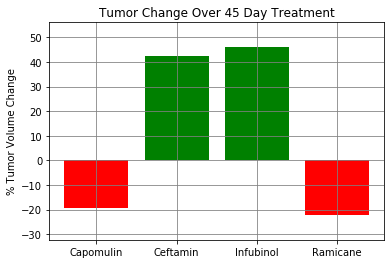

In [36]:
# X axis settings
x_axis = temp_names
x_position = [i for i, _ in enumerate(x_axis)]

plt.bar(x_position, percent_change, color=color_list)
#plt.bar(x_position, percent_change, color=matplotlib.colors.to_hex('#ff0000',keep_alpha=False))

# Y axis settings
max_yver_val = np.max(percent_change)+10
min_yver_val = np.min(percent_change)-10


plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylim(min_yver_val, max_yver_val)
plt.xticks(x_position, x_axis)
plt.grid(color='gray', axis='both')
fname = "output/tumor_change_45day.png"
plt.savefig(fname)
plt.show()

# Observations and Conclusions

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm
